# TASK1  
# Titanic Survival Prediction

# Import Libraries

In [12]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression

# Data frame from csv file 

In [14]:
tn_data = pd.read_csv('/Users/kashishtyagi/Desktop/Titanic-Dataset.csv')

In [15]:
tn_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
tn_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
tn_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [20]:
tn_data.shape

(891, 12)

In [21]:
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
tn_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
tn_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Handle missing value

In [25]:
Age = tn_data['Age'].mean()

In [26]:
tn_data['Age'].fillna(Age, inplace = True)

In [28]:
tn_data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [29]:
tn_data["Embarked"].fillna(tn_data["Embarked"].mode()[0], inplace=True)

In [32]:
tn_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Data Visualization

In [38]:
sns.set()

<Axes: xlabel='Sex', ylabel='count'>

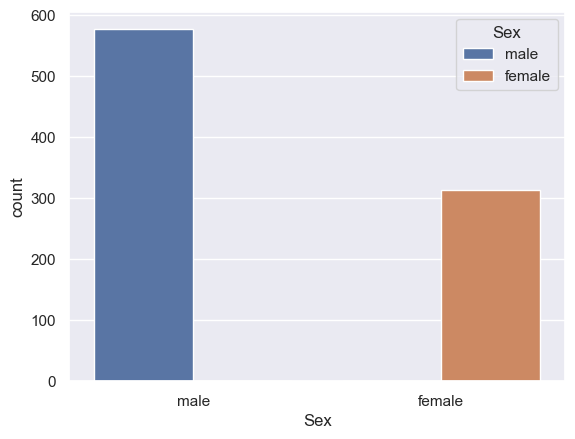

In [39]:
sns.countplot(x='Sex',hue = 'Sex', data=tn_data)

In [40]:
tn_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

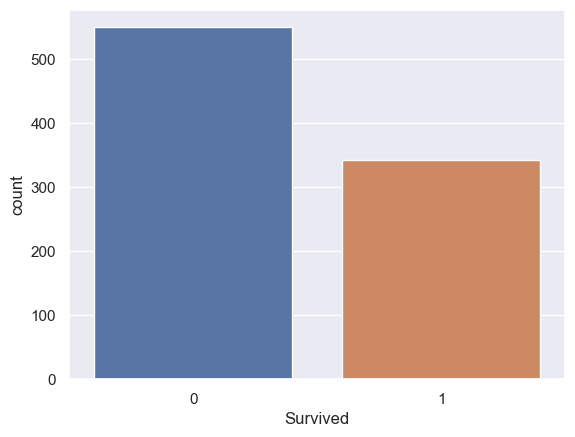

In [41]:
sns.countplot(x='Survived', data=tn_data)

<Axes: xlabel='Survived', ylabel='count'>

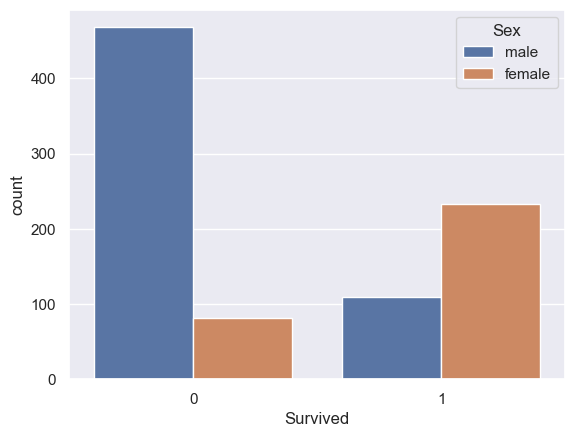

In [46]:
sns.countplot (x='Survived', hue = 'Sex', data = tn_data)

<Axes: xlabel='Parch', ylabel='count'>

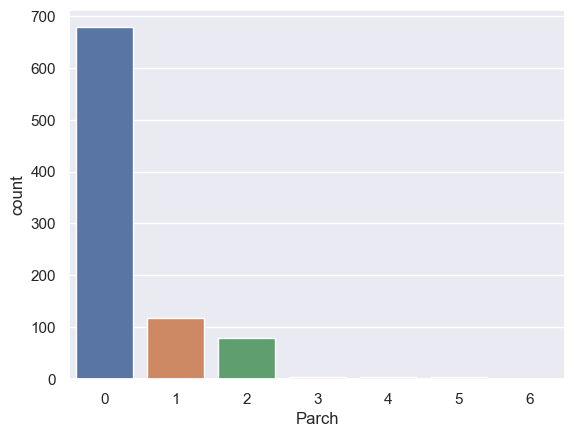

In [71]:
sns.countplot(x='Parch',data=tn_data)

In [72]:
print('Siblings:\n',tn_data['SibSp'].value_counts())
print('Parents : \n',tn_data['Parch'].value_counts())

Siblings:
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parents : 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [47]:
tn_data[['Survived', 'Sex']]

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [75]:
tn_data.groupby('Survived')['Sex'].value_counts()

Survived  Sex
0         0      468
          1       81
1         1      233
          0      109
Name: count, dtype: int64

In [48]:
 tn_data[['Survived', 'Pclass' ]]

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [76]:
tn_data.groupby('Survived')['Pclass'].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: count, dtype: int64

In [78]:
tn_data.groupby(['Survived','Pclass'])['Sex'].value_counts()

Survived  Pclass  Sex
0         1       0       77
                  1        3
          2       0       91
                  1        6
          3       0      300
                  1       72
1         1       1       91
                  0       45
          2       1       70
                  0       17
          3       1       72
                  0       47
Name: count, dtype: int64

In [79]:
tn_data.groupby(['Survived','Embarked'])['Sex'].value_counts()

Survived  Embarked  Sex
0         0         0      364
                    1       63
          1         0       66
                    1        9
          2         0       38
                    1        9
1         0         1      142
                    0       77
          1         1       64
                    0       29
          2         1       27
                    0        3
Name: count, dtype: int64

In [80]:
tn_data.groupby(['Survived','Embarked','Pclass'])['Sex'].value_counts()

Survived  Embarked  Pclass  Sex
0         0         1       0       51
                            1        2
                    2       0       82
                            1        6
                    3       0      231
                            1       55
          1         1       0       25
                            1        1
                    2       0        8
                    3       0       33
                            1        8
          2         1       0        1
                    2       0        1
                    3       0       36
                            1        9
1         0         1       1       48
                            0       28
                    2       1       61
                            0       15
                    3       0       34
                            1       33
          1         1       1       42
                            0       17
                    2       1        7
                            0   

# Converting the categorical variables into numerical data

In [50]:
tn_data.replace({'Sex':{'male':0, 'female':1},'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [51]:
tn_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [ ]:
#droping the columns which are irrelevant for the survival prediction, such as PassengerId, Name and Ticket

In [52]:
tn_data.drop(columns={'PassengerId','Name','Ticket'},axis=1, inplace=True)

In [53]:
tn_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


# Separating the target amd features

In [54]:
X = tn_data.drop(columns='Survived', axis=1)
Y = tn_data['Survived']

In [55]:
print(X)
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Splitting the data into training and testing

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [57]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Model training

In [ ]:
# logistic regression 

In [58]:
model = LogisticRegression()

In [59]:
model.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [60]:
X_test_prediction = model.predict(X_test)

In [86]:
X_train_prediction = model.predict(X_train)

In [61]:
print(X_test_prediction)

[0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0]


In [62]:
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [63]:
print('Accuracy score of test data is : ',testing_data_accuracy)

Accuracy score of test data is :  0.8156424581005587


In [81]:
# precision score
test_data_precision = precision_score(Y_test, X_test_prediction)

In [65]:
print('test data precion is :', test_data_precision)

test data precion is : 0.7611940298507462


In [83]:
from sklearn import metrics

In [84]:
score = model.score(X_test,Y_test)
print(score)

0.8156424581005587


In [87]:
cm = metrics.confusion_matrix(Y_train, X_train_prediction)
print(cm)

[[374  64]
 [ 79 195]]


Text(0.5, 1.0, "('Accuracy Score :', 0.8156424581005587)")

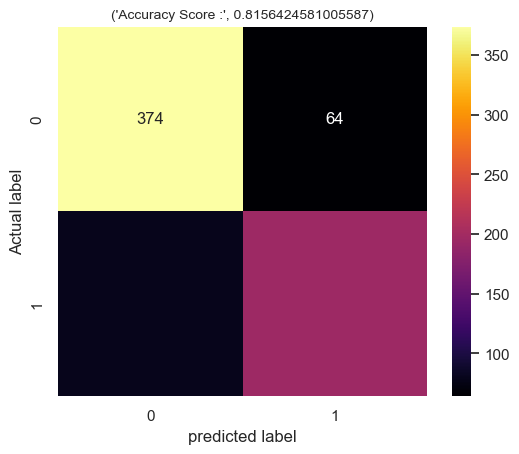

In [88]:
sns.heatmap(cm, annot = True, fmt = "d", square = True, cmap= "inferno")
plt.ylabel('Actual label')
plt.xlabel('predicted label')
title = ('Accuracy Score :',score)
plt.title(title, size = 10)

In [90]:
print(X) 
print(Y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [92]:
X_test_prediction = model.predict(X_test)

# Calculating the survival rate
survival_rate = X_test_prediction.mean()

if survival_rate < 1:
    print("Congratulations! You survived.")
else:
    print("I'm sorry, but you have failed to survive.")

Congratulations! You survived.
